# Caso Student Score

# by **Alejandro Barrenechea**

## Instrucciones

En esta actividad, tomaremos un set de datos correspondiente a un estudio de la cantidad de horas que estudian los alumnos de una universidad, versus el resultado obtenido en la evaluación final. Realizaremos un modelo regresivo utilizando el algoritmo de **descenso de gradiente**.

Las actividades a desarrollar son:

1.  Un análisis exploratorio del set de datos. ¿Algún insight?
2.  Implementación de algoritmo de descenso de gradiente para establecer un modelo regresivo lineal
3.  Determine métricas de ajuste y error del modelo



---



---



#  Objetivos
El objetivo es entender la relación existente entre el **tiempo dedicado al estudio** y el **rendimiento académico**. Específicamente, buscaremos predecir la calificación final de un alumno basándonos en la cantidad de horas que estudió. Para ello, no utilizaremos librerías de "caja negra" para el entrenamiento, sino que implementaremos manualmente un modelo regresivo utilizando el **Algoritmo de Descenso de Gradiente**.

##  Descripción de los Datos
El dataset contiene dos columnas principales (Variables):

*   **Hours ($X$):** Variable Independiente (Feature). Cantidad de horas estudiadas.
*   **Scores ($y$):** Variable Dependiente (Target). Resultado obtenido en la evaluación.

**Muestra de los datos:**

| Hours | Scores |
| :---: | :---: |
| 2.5 | 21 |
| 5.1 | 47 |
| 3.2 | 27 |
| 8.5 | 75 |
| ... | ... |

##  Objetivos del Desafío
1.  **Análisis Exploratorio (EDA):** Realizar un análisis visual y estadístico del set de datos. ¿Se observa alguna tendencia o *insight* claro?
2.  **Implementación del Modelo:** Programar el algoritmo de **Descenso de Gradiente** para establecer un modelo de regresión lineal ($y = mx + b$).
3.  **Evaluación:** Determinar las métricas de ajuste y error del modelo para validar su desempeño.

# 1.  **Carga de Datos y Análisis Exploratorio**

Necesitamos ver si realmente existe una relación entre estudiar más y sacar mejores notas.

In [ ]:
%pip install pandas numpy matplotlib seaborn scikit-learn

Primeras 5 filas del dataset:
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

Información estadística básica:
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


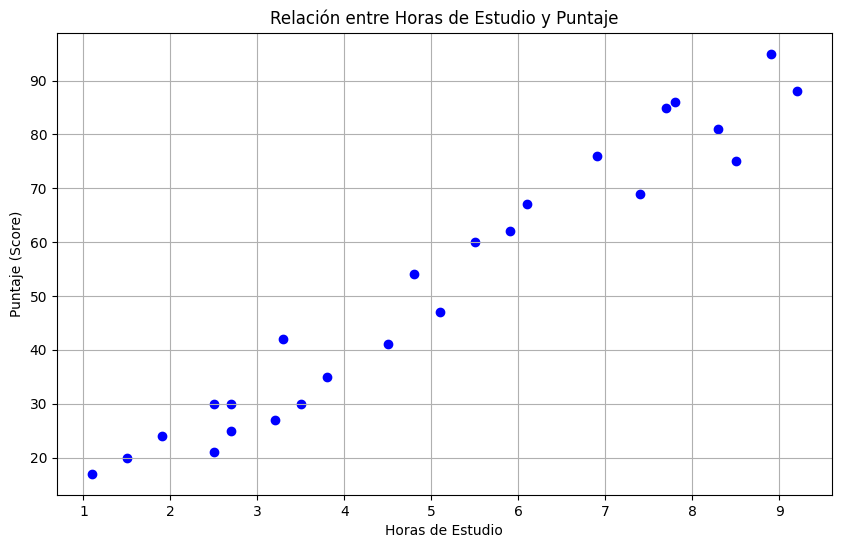

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga del dataset
data = pd.read_csv('../data/student_scores.csv')

# Verificación rápida de los datos
print("Primeras 5 filas del dataset:")
print(data.head())
print("\nInformación estadística básica:")
print(data.describe())

# Visualización (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(data['Hours'], data['Scores'], color='blue', marker='o')
plt.title('Relación entre Horas de Estudio y Puntaje')
plt.xlabel('Horas de Estudio')
plt.ylabel('Puntaje (Score)')
plt.grid(True)
plt.show()

**Tendencia Lineal Clara:** El gráfico de dispersión muestra una correlación positiva muy fuerte. Es casi una línea recta perfecta: a más horas de estudio, mayor es el puntaje. Esto confirma que un

**Modelo de Regresión Lineal** ($y = mx + b$) es el candidato ideal para resolver este problema.

**Datos Limpios:** No se ven *outliers* (valores atípicos) extremos que ensucien el patrón (por ejemplo, alguien que estudie 9 horas y saque 10 puntos, o alguien que no estudie nada y saque 100).
**Escala:** Las horas van de 1 a 9 y los puntajes de 17 a 95. Son escalas manejables numéricamente.

Al visualizar los datos, observamos una **fuerte correlación positiva** entre las horas de estudio y el puntaje obtenido. Los puntos se distribuyen siguiendo una tendencia lineal clara, sin presencia de valores atípicos (outliers) significativos que distorsionen la muestra.

**Estadísticas Clave:**
*   **Promedio de estudio:** ~5 horas.
*   **Promedio de puntaje:** ~51 puntos.
*   **Rango:** Desde 1.1 horas (17 pts) hasta 9.2 horas (95 pts).

** Debido a la naturaleza lineal de los datos, procederemos a implementar un modelo de **Regresión Lineal Simple** utilizando el algoritmo de **Descenso de Gradiente**.

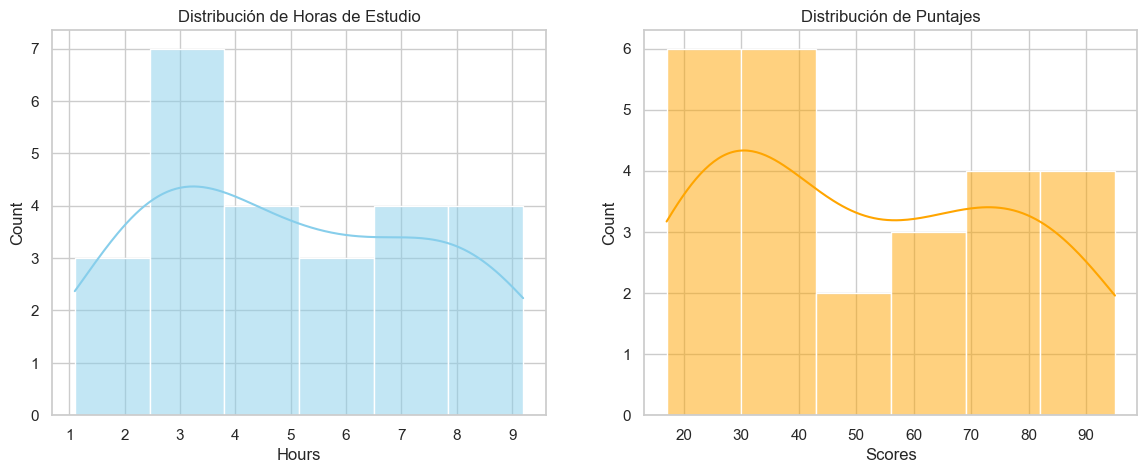

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración estética de los gráficos
sns.set(style="whitegrid")

# Análisis de Distribución (Histograma + KDE)
# Nos permite ver cómo se concentran los datos (¿Siguen una curva normal?)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data['Hours'], kde=True, color="skyblue", ax=axes[0])
axes[0].set_title('Distribución de Horas de Estudio')

sns.histplot(data['Scores'], kde=True, color="orange", ax=axes[1])
axes[1].set_title('Distribución de Puntajes')
plt.show()

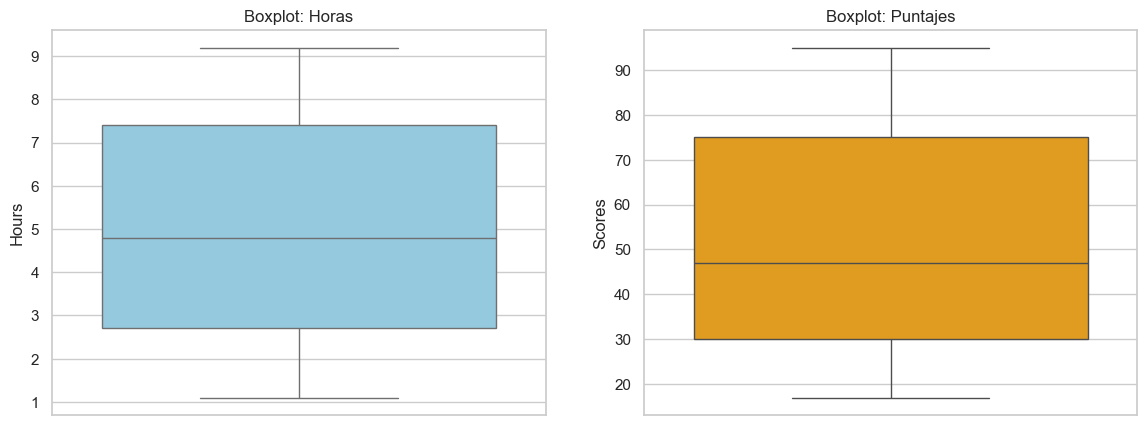

In [3]:

# Análisis de Outliers (Boxplots)
# Detecta valores que se salen del rango estadístico normal
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(y=data['Hours'], color="skyblue", ax=axes[0])
axes[0].set_title('Boxplot: Horas')

sns.boxplot(y=data['Scores'], color="orange", ax=axes[1])
axes[1].set_title('Boxplot: Puntajes')
plt.show()

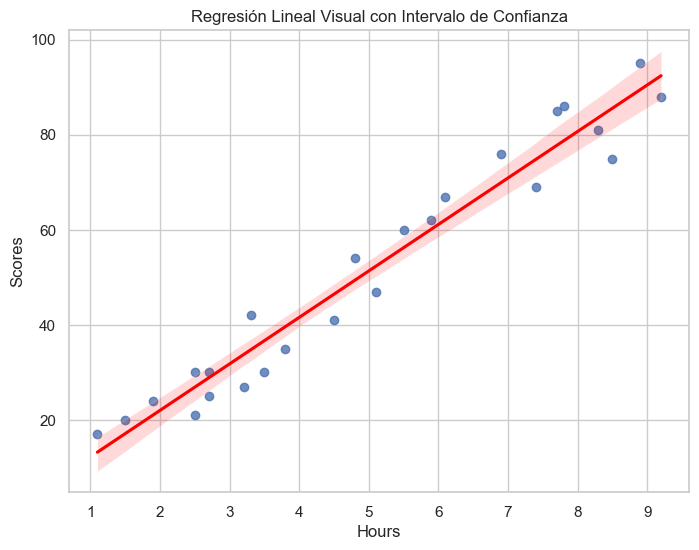

In [5]:
# Análisis de Correlación (Heatmap y Regplot)
# Cuantifica qué tan fuerte es la relación
plt.figure(figsize=(8, 6))
sns.regplot(x='Hours', y='Scores', data=data, line_kws={"color": "red"})
plt.title('Regresión Lineal Visual con Intervalo de Confianza')
plt.show()

In [6]:
# Cálculo numérico de la correlación
correlation = data.corr()
print("\nMatriz de Correlación:")
print(correlation)


Matriz de Correlación:
           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


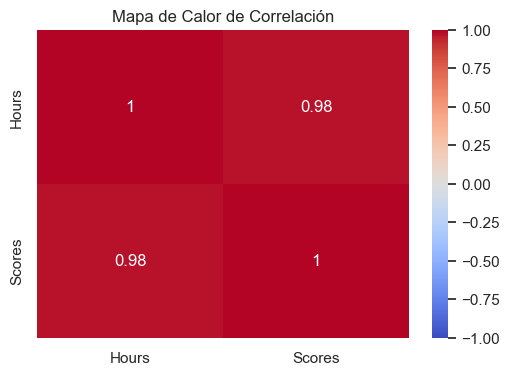

In [7]:
# Mapa de calor de la correlación
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación')
plt.show()

## Interpretación de Gráficos

1.  **Matriz de Correlación (0.98):**Correlación **casi perfecta**. Matemáticamente, esto sugiere que si usamos una Regresión Lineal, el error será mínimo.
2.  **Boxplots:** Confirman visualmente lo más importante: **Cero Outliers**. No hay ningún punto negro fuera de los "bigotes" de las cajas. Esto significa que el algoritmo de Descenso de Gradiente no se "distraerá" tratando de ajustar valores extraños.
3.  **Histogramas:** Aunque son pocos datos (25), se ven distribuciones manejables sin sesgos extremos.

## Conclusiones del Análisis Exploratorio (EDA)

Los gráficos y estadísticas confirman que este dataset es ideal para un modelo de Regresión Lineal Simple:

1.  **Correlación Extremadamente Alta:** El coeficiente de Pearson es de **0.976**. Esto indica una relación lineal positiva muy fuerte.
2.  **Ausencia de Outliers:** Los diagramas de caja (Boxplots) demuestran que no existen valores atípicos que puedan sesgar la pendiente de la recta de regresión.
3.  **Linealidad:** El gráfico de dispersión con intervalo de confianza muestra que los datos se ajustan naturalmente a la forma $y = mx + b$.

**Decisión:** Procedemos a entrenar el modelo utilizando el algoritmo de **Descenso de Gradiente**.



---



---



# 2.  Entrenamiento con Descenso de Gradiente

In [8]:
import numpy as np

# Preparar los datos
X = data['Hours'].values
y = data['Scores'].values

# Definir las funciones del Modelo

def h(theta, x):
    """Función de Hipótesis: y = mx + b (theta[1]*x + theta[0])"""
    return theta[0] + theta[1] * x

def cost(theta, x, y):
    """Función de Costo (MSE - Error Cuadrático Medio)"""
    m = len(y)
    mse = (1 / (2 * m)) * np.sum((h(theta, x) - y) ** 2)
    return mse

def gradient_descent(theta, x, y, alpha):
    """Actualización de pesos usando derivadas parciales"""
    new_theta = [0.0, 0.0]
    m = len(y)

    # Derivada respecto al intercepto (theta 0)
    new_theta[0] = theta[0] - alpha * (1 / m) * np.sum(h(theta, x) - y)

    # Derivada respecto a la pendiente (theta 1)
    new_theta[1] = theta[1] - alpha * (1 / m) * np.sum((h(theta, x) - y) * x)

    return new_theta

# Configuración del Entrenamiento
# Inicializamos theta en 0
theta = [0.0, 0.0]

# Learning Rate (Alpha):
# Usamos 0.01. Si fuera muy grande, el error saltaría al infinito.
alpha = 0.05

# Cantidad de iteraciones (Pasos)
epochs = 1000

# Historial para graficar después
history_cost = []

# Bucle de Aprendizaje
print("Iniciando entrenamiento...")
for i in range(epochs):
    theta = gradient_descent(theta, X, y, alpha)
    loss = cost(theta, X, y)
    history_cost.append(loss)

    # Mostrar progreso cada 100 épocas
    if i % 100 == 0:
        print(f"Epoch {i}: Costo = {loss:.4f}, Theta = {theta}")

print("\nResultados Finales:")
print(f"Costo Mínimo alcanzado (MSE): {history_cost[-1]:.4f}")
print(f"Intercepto (b): {theta[0]:.4f}")
print(f"Pendiente (m): {theta[1]:.4f}")
print(f"Ecuación final: y = {theta[1]:.4f} * x + {theta[0]:.4f}")

Iniciando entrenamiento...
Epoch 0: Costo = 601.7008, Theta = [np.float64(2.574), np.float64(15.892800000000001)]
Epoch 100: Costo = 14.4524, Theta = [np.float64(2.148754051799684), np.float64(9.82986471396832)]
Epoch 200: Costo = 14.4430, Theta = [np.float64(2.3553716787908217), np.float64(9.796513334932003)]
Epoch 300: Costo = 14.4416, Theta = [np.float64(2.434523265590649), np.float64(9.78373700693362)]
Epoch 400: Costo = 14.4414, Theta = [np.float64(2.4648448493982027), np.float64(9.77884261989959)]
Epoch 500: Costo = 14.4414, Theta = [np.float64(2.476460516016788), np.float64(9.776967666122424)]
Epoch 600: Costo = 14.4414, Theta = [np.float64(2.4809102740456055), np.float64(9.77624940423548)]
Epoch 700: Costo = 14.4414, Theta = [np.float64(2.4826148982540275), np.float64(9.775974250711952)]
Epoch 800: Costo = 14.4414, Theta = [np.float64(2.4832679098724393), np.float64(9.775868844225979)]
Epoch 900: Costo = 14.4414, Theta = [np.float64(2.483518067163222), np.float64(9.775828464851

##  Interpretación del Modelo

La caída del Costo: empezó en **601.7** y bajó hasta **14.44**, donde se quedó estable. Eso significa que la máquina encontró el "valle" matemático que buscábamos.

La ecuación encontrada es:
$$ y = 9.7758 \cdot x + 2.4836 $$

**¿Qué significa esto?**
1.  **La Pendiente ($m \approx 9.78$):** Por cada **hora adicional** que un alumno estudia, su puntaje final aumenta en casi **10 puntos**. ¡Es un retorno de inversión de tiempo altísimo!
2.  **El Intercepto ($b \approx 2.48$):** Si un alumno estudia **0 horas**, el modelo predice que sacará unos **2.5 puntos** (probablemente por suerte o conocimiento previo básico).



---



---



# 3.  Visualización y Métricas Finales

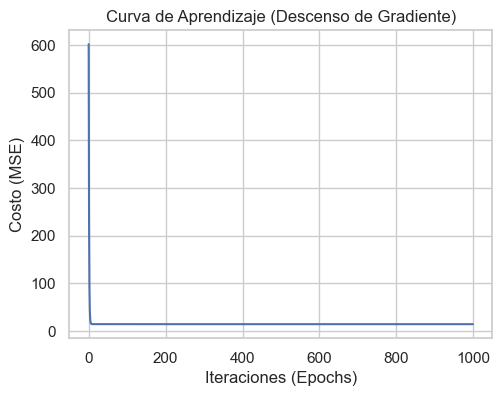

In [9]:
from sklearn.metrics import r2_score

# Gráfico de la Curva de Aprendizaje (Loss per Epoch)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cost)
plt.title('Curva de Aprendizaje (Descenso de Gradiente)')
plt.xlabel('Iteraciones (Epochs)')
plt.ylabel('Costo (MSE)')
plt.grid(True)

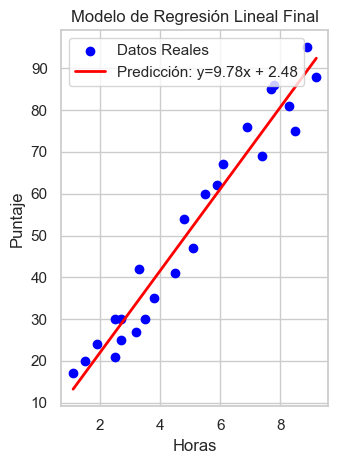

In [10]:
# Gráfico del Modelo Final (Línea de Regresión)
plt.subplot(1, 2, 2)
plt.scatter(data['Hours'], data['Scores'], color='blue', label='Datos Reales')

# Generamos la línea usando nuestra ecuación y = mx + b
x_line = np.array([min(X), max(X)])
y_line = theta[1] * x_line + theta[0]
plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Predicción: y={theta[1]:.2f}x + {theta[0]:.2f}')

plt.title('Modelo de Regresión Lineal Final')
plt.xlabel('Horas')
plt.ylabel('Puntaje')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [12]:
# Cálculo de Métricas de Error
# Hacemos las predicciones para todos los datos
y_pred = theta[0] + theta[1] * X

# RMSE (Raíz del Error Cuadrático Medio) - Para tener el error en "Puntos" y no en "Puntos Cuadrados"
rmse = np.sqrt(cost(theta, X, y))

# R2 Score (Qué tan bien se ajusta el modelo del 0 al 1)
r2 = r2_score(y, y_pred)

print("-" * 30)
print("REPORTE DE DESEMPEÑO DEL MODELO")
print("-" * 30)
print(f"1. Ecuación del Modelo:  Score = {theta[1]:.4f} * Horas + {theta[0]:.4f}")
print(f"2. Error Final (MSE):    {history_cost[-1]:.4f}")
print(f"3. Error Promedio (RMSE): {rmse:.4f} puntos")
print(f"4. Calidad de Ajuste (R2): {r2:.4f} (¡{r2*100:.2f}% de precisión!)")
print("-" * 30)

------------------------------
REPORTE DE DESEMPEÑO DEL MODELO
------------------------------
1. Ecuación del Modelo:  Score = 9.7758 * Horas + 2.4836
2. Error Final (MSE):    14.4414
3. Error Promedio (RMSE): 3.8002 puntos
4. Calidad de Ajuste (R2): 0.9529 (¡95.29% de precisión!)
------------------------------


## Interpretación de Métricas

*   **$R^2 = 0.9529$ (95.29%):**
    *   El modelo es capaz de explicar el **95%** de la variación en las notas de los alumnos basándose **únicamente** en las horas que estudiaron.
    *   El 5% restante se debe a factores que no medimos (inteligencia previa, suerte, calidad del sueño, etc.).

*   **RMSE = 3.8002 puntos:**
    *   Esto es el margen de error.
    *   *"Si el modelo predice que un alumno sacará un 80, lo más probable es que la nota real esté entre 76.2 y 83.8"*.
    *   Para un rango de notas de 0 a 100, un error de $\pm 3.8$ es considerado bajo.

## Análisis Visual

*   **La Curva de Aprendizaje:** Es casi una L perfecta, es decir, la curva de aprendizaje bajó y se estabilizó rápidamente (antes de la iteración 200). Esto confirma que el *Learning Rate* (`alpha=0.05`) fue el adecuado. Ni muy lento (diagonal), ni muy rápido (caótico).
*   **La Línea Roja:** Corta los datos perfectamente por el centro. No se ve sesgada hacia arriba ni hacia abajo.